In [2]:
import pandas as pd
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#prepare Fearures and Labels
X = df.drop(columns='species', axis=1)
y = df['species']

In [7]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Normalize the features
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [9]:
# Train KNN Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
# Predicat and Evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print("Model Accuracy: ", model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

Model Accuracy:  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
# Instead of only KNN compare several models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {model.score(X_test, y_test):.2f}")

Logistic Regression Accuracy: 1.00
K-Nearest Neighbors Accuracy: 1.00
SVM Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00


In [13]:
# Hyperparameter Tuning (Grid Search CV)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)

Best parameters found:  {'n_neighbors': 9, 'weights': 'distance'}


<Axes: >

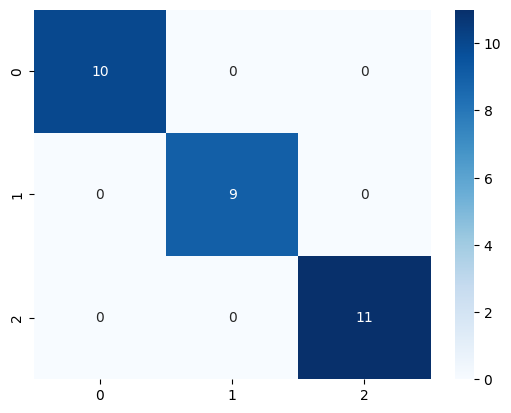

In [14]:
# CONFUSION MATRIX visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' )

In [16]:
# Deploy as a web app Streamlit
import streamlit as st
import pandas as pd
import joblib

import os

if not os.path.exists("knn_model.pkl"):
    from sklearn.neighbors import KNeighborsClassifier
    # Use X and y from your notebook
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)
    joblib.dump(knn, "knn_model.pkl")

model = joblib.load("knn_model.pkl")
sepal_length = st.slider("Sepal Length", 4.0, 8.0)
sepal_width = st.slider("Sepal Width", 2.0, 5.0)
petal_length = st.slider("Petal Length", 1.0, 7.0)
petal_width = st.slider("Petal Width", 0.1, 2.5)

if st.button("Predict"):
    prediction = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
    st.success(f"The predicted species is: {prediction[0]}")

2025-07-12 19:22:16.106 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.109 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.112 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.116 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.118 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`


2025-07-12 19:22:16.121 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.796 
  command:

    streamlit run C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-12 19:22:16.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 19:22:16.805 Thread 'MainThread': missing ScriptRunContext! This w

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
labels = iris.target

features_train, features_test, labels_train, labels_test= train_test_split(features, labels , test_size=.5)

my_classifier = KNeighborsClassifier()
my_classifier.fit(features_train, labels_train)

prediction = my_classifier.predict(features_test)

print(prediction)


[0 1 2 1 1 0 2 0 2 1 2 0 2 0 0 2 1 2 0 2 1 0 2 2 0 2 0 0 1 2 0 2 2 1 2 0 1
 1 2 0 0 1 2 1 0 2 1 0 1 1 0 0 0 2 2 0 1 0 1 2 1 2 0 1 2 0 1 0 1 2 1 2 1 2
 0]


In [4]:
#Testing Prediction Accuracy With Test Data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, prediction))
#Versicolor
iris1 = [[4.7, 2.5, 3.1, 1.2]]
iris_prediction = my_classifier.predict(iris1)

if iris_prediction[0] == 0:
    print("Setosa")
if iris_prediction[0] == 1:
    print("Versicolor")
if iris_prediction[0] == 2:
    print("Virginica")

0.92
Versicolor


TypeError: DataFrame.drop() got an unexpected keyword argument 'cplumns'